In [141]:
import pandas as pd
import math
import random
import os
os.chdir("C:\\Users\\zaid0\\Documents\\R\\CM121")

In [142]:
# read in data and global variables
data = pd.read_table("HW1\\Data\\reads.tsv", sep = "\t")
pAA = 0.95**2
pTT = 0.05**2
pAT = 1 - (pAA + pTT)

In [143]:
# function that generates posterior probabilities for a biallelic model, assuming P(S = A) = P(S = B)
def posteriorProbs(df, A, B, pAA, pBB, pAB):
    # generate log liklihoods for each genotype
    llAA = 0
    llBB = 0
    llAB = 0
    for i in range(len(df)):
        O = df.at[i, 'observations']
        E = df.at[i, 'probability_of_error']
        if O == A:
            E = 1 - E
        llAA += math.log(E)
        llBB += math.log(1 - E) # all error probabilities are just the complement of the AA genotype's
        llAB += math.log(0.5) # read's likelihood simplifies to 0.5 under assumption that P(S = A) = P(S = B)
    # calculate denominator of Bayes' theorem equation
    d = math.exp(llAA + math.log(pAA)) + math.exp(llBB + math.log(pBB)) + math.exp(llAB + math.log(pAB))
    # calculate posterior probabilities for each genotype
    ppAA = math.exp(llAA + math.log(pAA) - math.log(d))
    ppBB = math.exp(llBB + math.log(pBB) - math.log(d))
    ppAB = math.exp(llAB + math.log(pAB) - math.log(d))
    return [ppAA, ppBB, ppAB]

In [144]:
# 2.b
print(posteriorProbs(data, "A", "T", pAA, pTT, pAT))

[4.566267927307039e-300, 6.963414923108035e-290, 1.0]


In [145]:
# 2.c
size = 5
sample = data.sample(n = size, random_state = 123)
sample.index = range(size)
print(posteriorProbs(sample, "A", "T", pAA, pTT, pAT))

[0.7450913796442712, 0.00012183530699187445, 0.25478678504873675]


<AxesSubplot: ylabel='Frequency'>

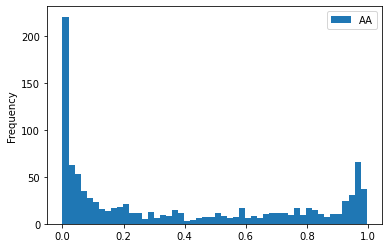

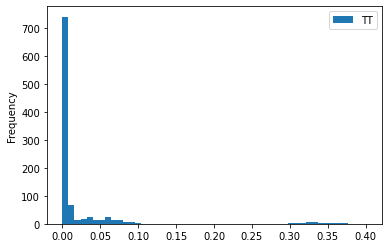

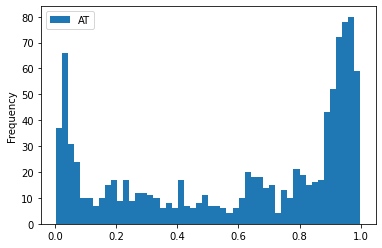

In [168]:
#2.d
size = 5
bootstrap1 = pd.DataFrame(
            {"AA" : [],
             "TT" : [],
             "AT" : []}
            )
for i in range(1000):
    sample = data.sample(n = size)
    sample.index = range(size)
    pp = posteriorProbs(sample, "A", "T", pAA, pTT, pAT)
    df = pd.DataFrame(
            {"AA" : [pp[0]],
             "TT" : [pp[1]],
             "AT" : [pp[2]]}
        )
    bootstrap1 = pd.concat([bootstrap1, df], axis = 0)
    
bootstrap1[["AA"]].plot.hist(bins = 50)
bootstrap1[["TT"]].plot.hist(bins = 50)
bootstrap1[["AT"]].plot.hist(bins = 50)

<AxesSubplot: ylabel='Frequency'>

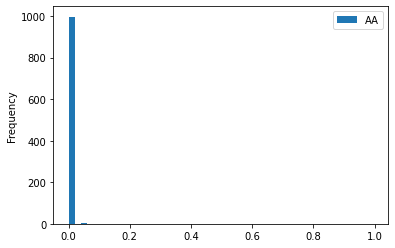

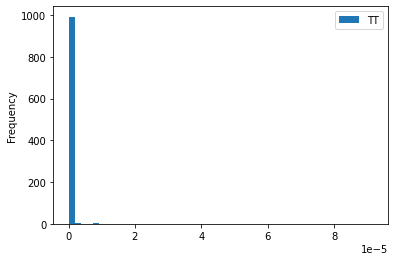

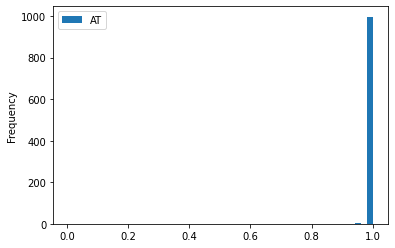

In [169]:
#2.e
size = 50
bootstrap2 = pd.DataFrame(
            {"AA" : [],
             "TT" : [],
             "AT" : []}
            )
for i in range(1000):
    sample = data.sample(n = size)
    sample.index = range(size)
    pp = posteriorProbs(sample, "A", "T", pAA, pTT, pAT)
    df = pd.DataFrame(
            {"AA" : [pp[0]],
             "TT" : [pp[1]],
             "AT" : [pp[2]]}
        )
    bootstrap2 = pd.concat([bootstrap2, df], axis = 0)
    
bootstrap2[["AA"]].plot.hist(bins = 50)
bootstrap2[["TT"]].plot.hist(bins = 50)
bootstrap2[["AT"]].plot.hist(bins = 50)

In [177]:
# 2.f
print("n = 5\n", bootstrap1.describe(), "\n")
print("n = 50\n", bootstrap2.describe())

n = 5
                 AA            TT           AT
count  1000.000000  1.000000e+03  1000.000000
mean      0.376651  2.144274e-02     0.601907
std       0.372077  6.313373e-02     0.356258
min       0.000001  7.946606e-11     0.004222
25%       0.027674  4.129494e-05     0.241429
50%       0.213760  8.381962e-04     0.717424
75%       0.758397  8.921826e-03     0.928478
max       0.995778  4.013201e-01     0.998685 

n = 50
                  AA            TT           AT
count  1.000000e+03  1.000000e+03  1000.000000
mean   1.121879e-03  1.820011e-07     0.998878
std    3.153972e-02  3.228188e-06     0.031540
min    6.789328e-32  2.615135e-30     0.005427
25%    2.018616e-17  1.436854e-19     1.000000
50%    1.639220e-14  8.496521e-17     1.000000
75%    1.461765e-11  5.293691e-14     1.000000
max    9.945728e-01  9.168673e-05     1.000000
